<center><p><b>GUÍA PRÁCTICA 2 - MINERÍA DE DATOS<br>EDUARDO MENDIETA</b></p></center>

## Introducción

La visualización de datos es una parte imprescindible en la minería de datos. Lo primero que hacemos cuando nos enfrentamos a un nuevo conjunto de datos es el análisis exploratorio que nos permite conocer mejor nuestros datos. En esta fase, ser capaces de crear visualizaciones ayuda notablemente a entender la estructura y ver más claras las relaciones entre las variables, sobretodo cuando nos enfrentamos a _datasets_ grandes o con una alta dimensionalidad.

Podemos ver el análisis visual de los datos incluido en un proceso contínuo de _feedback_ entre la visualización y la construcción de modelos estadísticos, como nos propone Keim (diagrama). Un modelo estadístico más adecuado nos permite crear mejores visualizaciones que a la vez, nos darán pistas para construir modelos más complejos y detallados.

![](images/keim.png)

En esta actividad presentaremos algunas de las librerías más usadas en `Python` para generar visualizaciones y mostraremos ejemplos de cómo generar los gráficos más habituales.

## Librerías de visualización de datos

### Matplotlib

[`Matplotlib`](https://matplotlib.org/) es la librería de visualización de datos más popular, y permite crear visualizaciones de una forma bastante fácil.

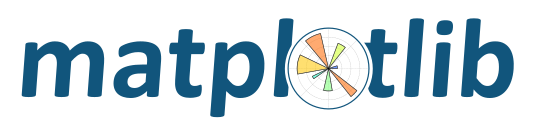

### Seaborn

[`Seaborn`](https://seaborn.pydata.org/) es una librería basada en `Matplotlib` que está enfocada en la visualización de modelos estadíticos. `Seaborn` no pretende substituir `Matplotlib`, sinó complementarla para poder hacer visualizaciones más complejas con una programación de alto nivel y con menos esfuerzo.

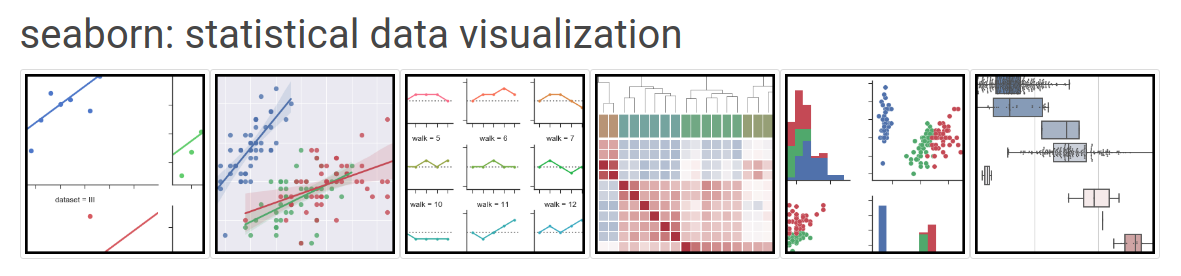

### Bokeh

[`Bokeh`](https://bokeh.pydata.org/en/latest/) es otra librería de visualización de datos enfocada a las visualizaciones interactivas. A diferencia de `Seaborn`, `Bokeh` és independiente de `Matplotlib`. El principal foco de `Bokeh` es la interacción en el web en el estilo de los documentos centrados en datos [D3.js Data-Driven Documents](https://d3js.org/).

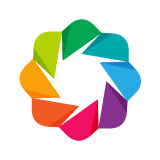![Bokeh](images/bokeh.png)

## _House prices dataset_

El conjunto de datos que usaremos en esta actividad corresponde al _dataset_ [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) que es una de las competiciones de iniciación de [Kaggle](www.kaggle.com).

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('data/train.csv')

## Visualizaciones más comunes

A continuación veremos algunas de les visualizaciones más comunes y cómo implementarlas en alguna de las tres librerías que hemos presentado antes.

### Diagrama de barras

El diagrama de barras es una de las visualizaciones más comunes. Nos muestra la relación entre una variable numérica y otra de categórica. Por ejemplo, podemos mostrar la relación entre el número de baños de una vivenda y el precio de venda medio.

En este ejemplo, primero calcularemos el precio medio de venta por número de baños y después usaremos la función `plot` de `Matplotlib` para visualizarla.

/tmp/ipykernel_56830/83774224.py:1: FutureWarning: The provided callable <function mean at 0x7f129d158e00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = df_train.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.mean)


<Axes: xlabel='FullBath'>

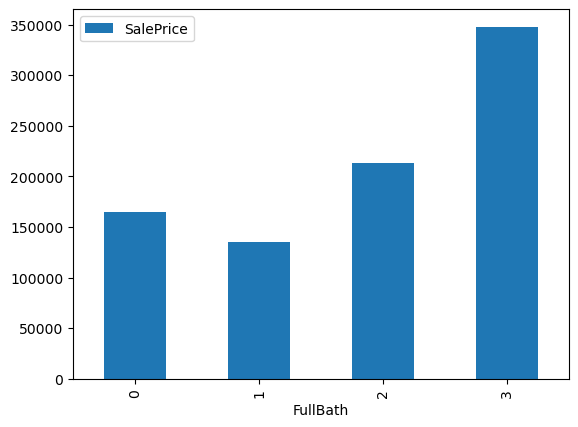

In [2]:
pivot = df_train.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.mean)
pivot.plot(kind='bar')

### Histograma y diagrama de densidad

#### Histograma

Un histograma nos permite representar gráficamente la distribución de una variable numérica. La variable se divide en diferentes particiones o _bins_ que representan un rango de valores de la variable. Para cada partición se representa el número de observaciones en aquel rango de valores. La forma del histograma puede canviar considerablemente dependiendo del número de particiones que definamos.

A continuación mostraremos la distribución de la variable `SalePrice` con diferentes números de particiones. Usaremos la función `distplot` de la librería `Seaborn`.

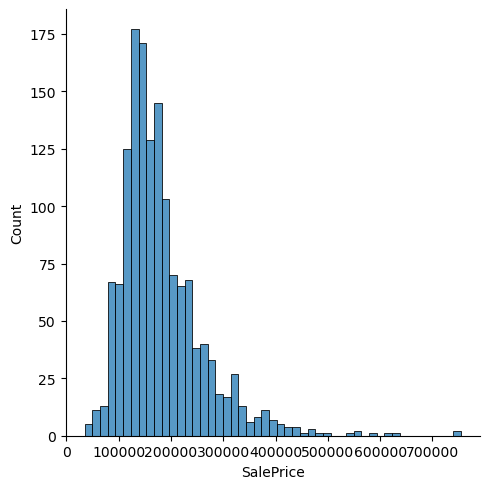

In [3]:
sns.displot(df_train["SalePrice"])

Canviamos el nombre de particiones a 100:

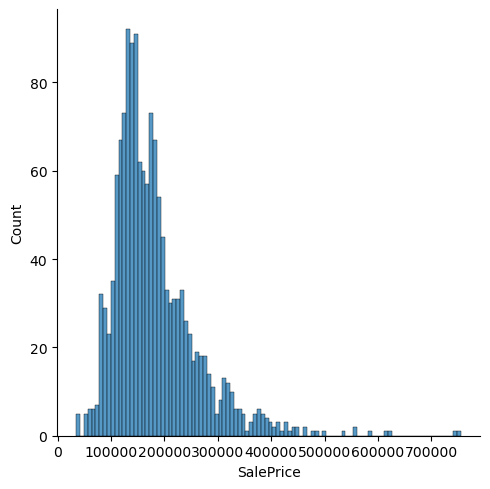

In [4]:
sns.displot(df_train["SalePrice"], bins=100)

Y ahora con sólo 10:

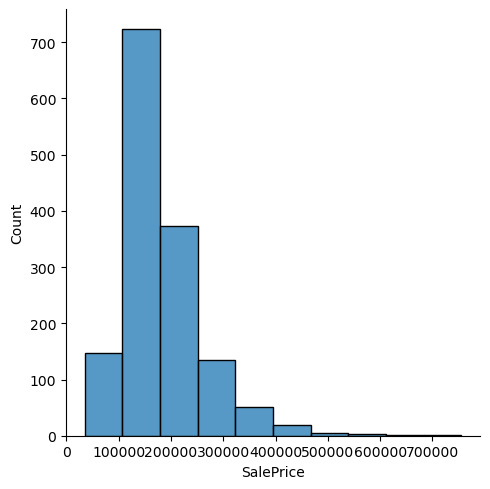

In [5]:
sns.displot(df_train["SalePrice"], bins=10)

#### Diagrama de densidad

El diagrama de densidad también muestra la distribución de una variable numérica, y es muy parecido al histograma. El diagrama de densidad es una curva que suaviza la discontinuidad de las particiones del histograma y tiene un parámetre _bandwidth_ (`bw`) para controlar de qué manera se adapta a los datos.

<Axes: xlabel='SalePrice', ylabel='Density'>

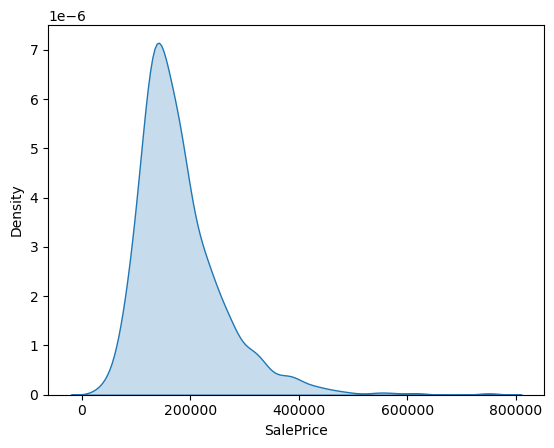

In [6]:
sns.kdeplot(df_train["SalePrice"], fill=True)

El valor per defecto intenta hacer una buena adaptación pero puede ser útil probar otros valores.

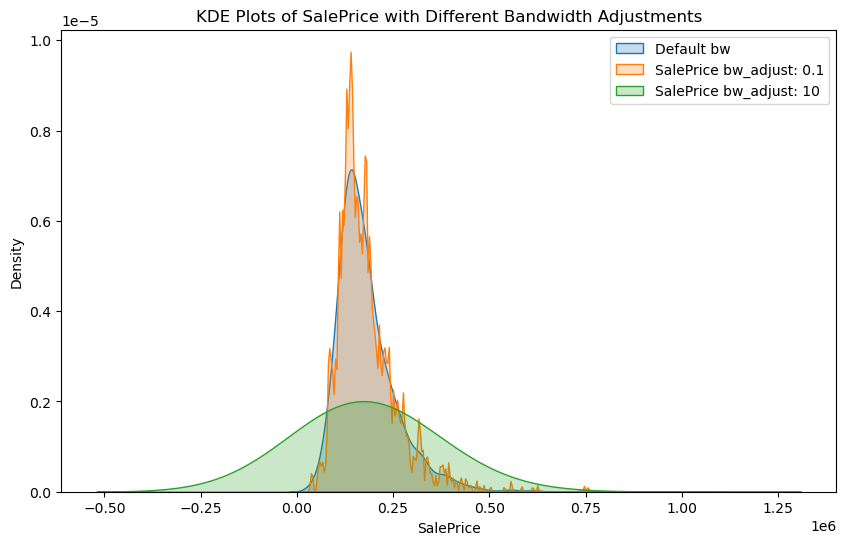

In [7]:
# Updated KDE plots with different bandwidth adjustments
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train["SalePrice"], fill=True, label="Default bw")
sns.kdeplot(df_train["SalePrice"], fill=True, bw_adjust=0.1, label="SalePrice bw_adjust: 0.1")
sns.kdeplot(df_train["SalePrice"], fill=True, bw_adjust=10, label="SalePrice bw_adjust: 10")

# Add legend
plt.legend()
plt.title("KDE Plots of SalePrice with Different Bandwidth Adjustments")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.show()

### Diagrama de cajas y de violín

El diagrama de cajas nos da un sumario gráfico de una o varias variables. La línia que divide la caja en dos mitades representa el valor de la mediana de los datos. Los extremos de la caja muestras los cuartiles inferiores y superiores y las línias extremas los valores máximos y mínimos excluyendo los _outliers_. El diagrama de cajas pero, esconde parte de la información, como la distribución de los valores de la variable o el número de observaciones.

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

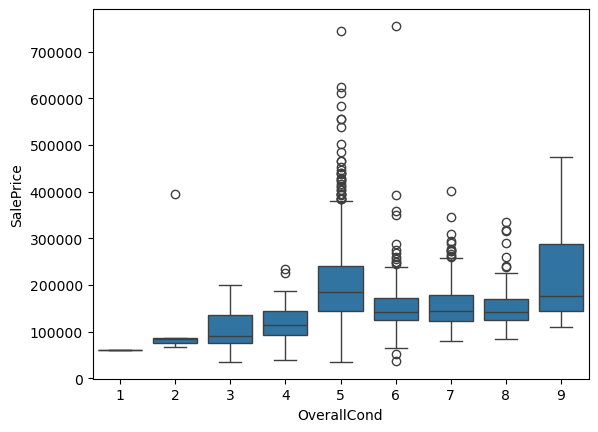

In [8]:
sns.boxplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

Podemos añadirle el detalle de las observaciones o _jitter_ con la función `swarmplot` de `Seaborn`.

/home/zbodhix/miniconda3/envs/ista/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zbodhix/miniconda3/envs/ista/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zbodhix/miniconda3/envs/ista/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zbodhix/miniconda3/envs/ista/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zbodhix/minico

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

/home/zbodhix/miniconda3/envs/ista/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zbodhix/miniconda3/envs/ista/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 80.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zbodhix/miniconda3/envs/ista/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zbodhix/miniconda3/envs/ista/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zbodhix/minico

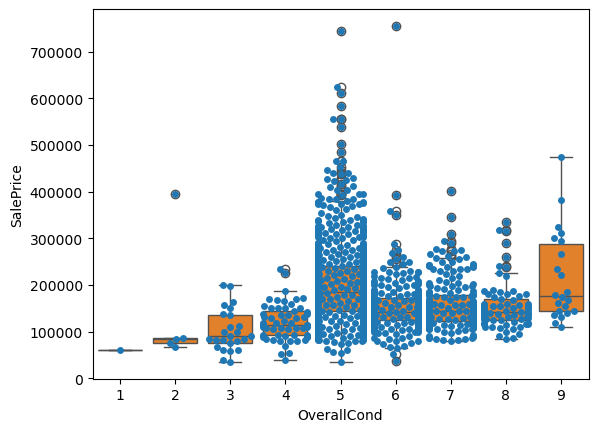

In [9]:
sns.swarmplot(x=df_train["OverallCond"], y=df_train["SalePrice"])
sns.boxplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

En nuestro caso tenemos un número grande de observaciones y probablemente es mejor usar el diagrama de violín para ver la distribución de las variables.

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

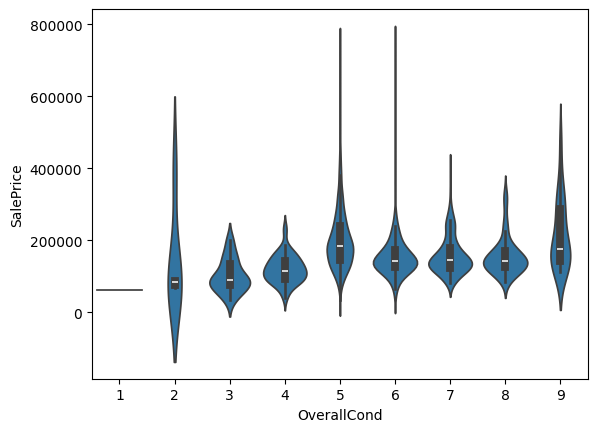

In [ ]:
sns.violinplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

### Diagrama de dispersión

El diagrama de dispersión muestra la relación de dos variables en dos dimensiones. Cada punto representa una observación, y la posición en los ejes horitzontal y vertical representa el valor de las dos variables para aquella observación. Es un diagrama muy útil para estudiar la relación entre dos variables.

Mostramos la relación entre el precio de venda y los metros cuadrados de una vivienda. Como es de esperar, vemos una clara correlación entre las dos variables.

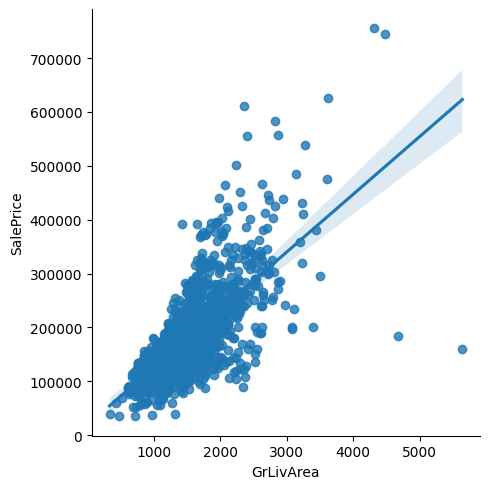

In [ ]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=df_train, fit_reg=True, legend=False)

Podemos añadirle una tercera dimensión usando colores para codificar otra variable. En este caso, añadiremos la variable categórica `OverallQual` que corresponde a la calificación del habitaje y la mostraremos con un código de colores.

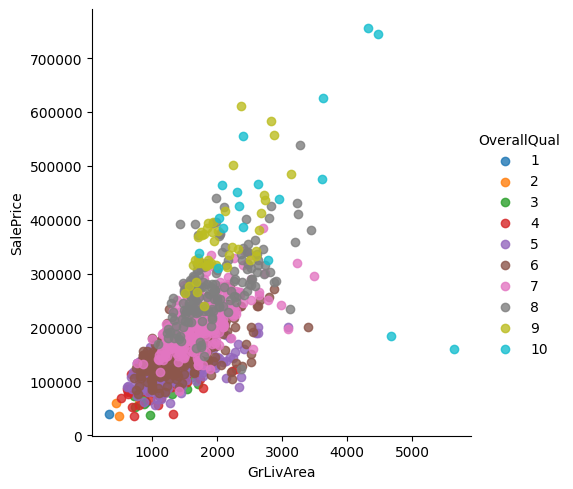

In [ ]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=df_train, fit_reg=False, hue="OverallQual", legend=True)

La librería `Seaborn` nos permite crear visualizaciones más complejas, y añadirle un histograma para cada eje. A la vez, nos calcula el coeficiente de correlació de Pearson y el p-valor de la medida de correlación.

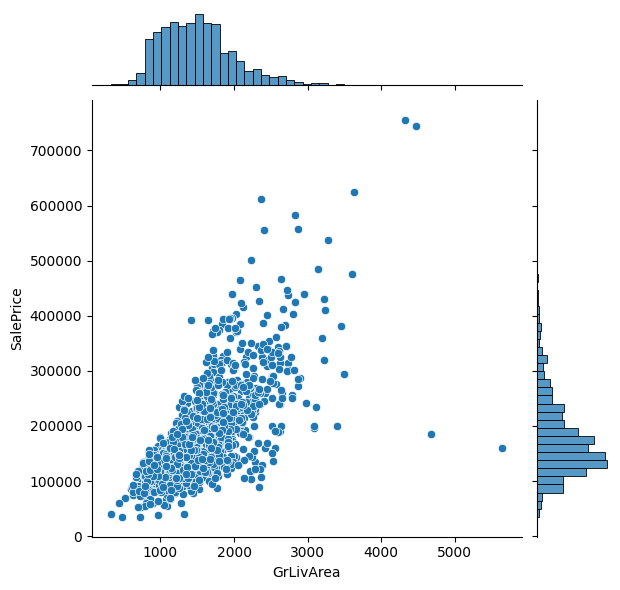

In [ ]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=df_train, kind='scatter')

Si el hecho de tener muchas observaciones nos esconde la densidad de éstas, podemos usar un `hexbin plot`, que nos divide la cuadrícula en hexágonos y nos codifica con un color más intenso donde tenemos más densidad de observaciones.

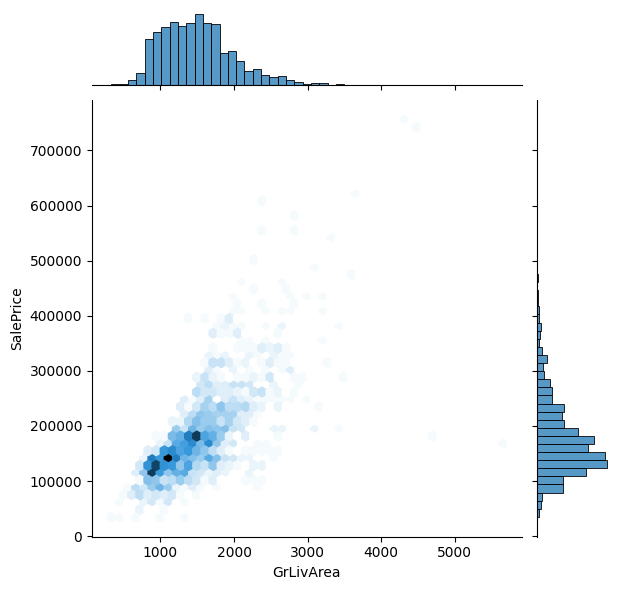

In [ ]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=df_train, kind='hex')

### Mapa de calor

El mapa de calor es una representación gráfica de los datos donde los valors de una matriz són representados con colores. Es útil para representar visualmente una matriz numérica de datos.

En el siguiente ejemplo, calcularemos la correlación entre diversas variables del conjunto de datos y la mostraremos visualmente con un mapa de calor.

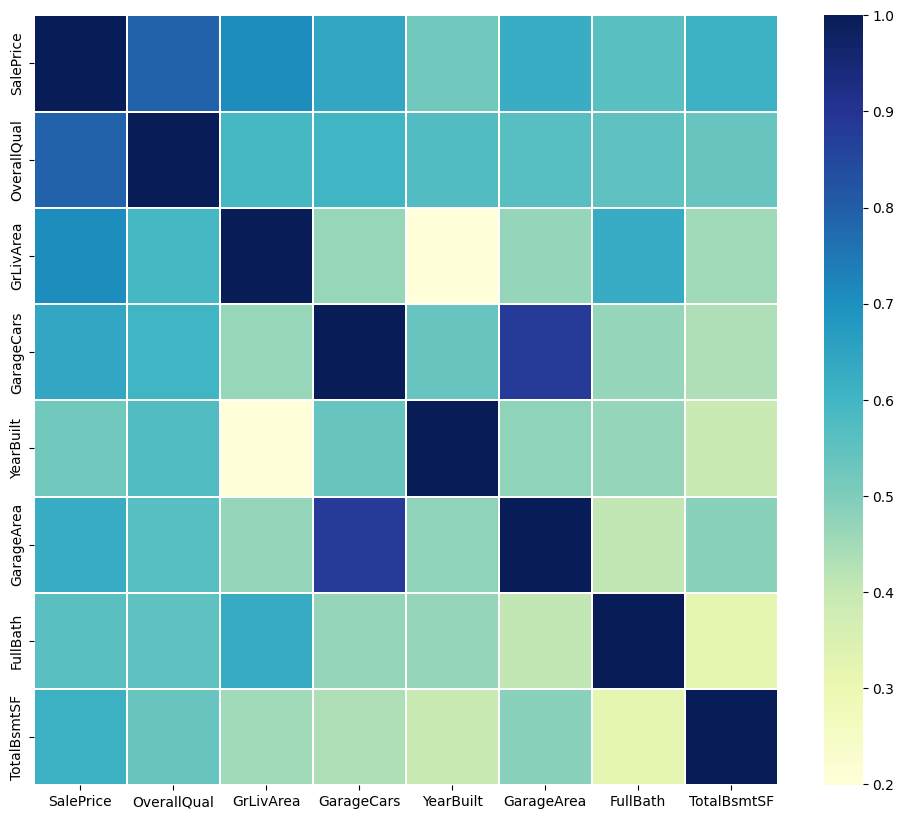

In [ ]:
# Assuming df_train is already defined and contains the necessary columns

# Select only numeric columns
df_numeric = df_train.select_dtypes(include=[np.number])

# Compute the Spearman correlation matrix
corrmat = df_numeric.corr(method='spearman')

# Number of variables for heatmap
k = 8

# Get the top k variables most correlated with 'SalePrice'
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# Compute the correlation coefficient matrix for the selected variables
cm = np.corrcoef(df_numeric[cols].values.T)

# Plot the heatmap
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

# Show the plot
plt.show()

Mapa de texto

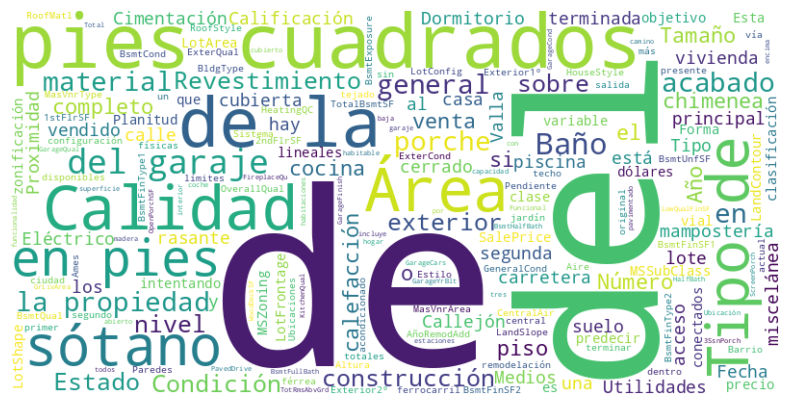

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Descripciones de las columnas
column_descriptions = """
SalePrice: precio de venta de la propiedad en dólares. Esta es la variable objetivo que estás intentando predecir.
MSSubClass: la clase de construcción
MSZoning: La clasificación general de zonificación
LotFrontage: Pies lineales de calle conectados a la propiedad.
LotArea: Tamaño del lote en pies cuadrados
Calle: Tipo de acceso vial
Callejón: Tipo de acceso al callejón.
LotShape: Forma general de la propiedad.
LandContour: Planitud de la propiedad.
Utilidades: Tipo de utilidades disponibles
LotConfig: configuración del lote
LandSlope: Pendiente de la propiedad
Barrio: Ubicaciones físicas dentro de los límites de la ciudad de Ames.
Condición 1: Proximidad a la carretera principal o al ferrocarril.
Condición 2: Proximidad a una carretera principal o vía férrea (si hay una segunda)
BldgType: Tipo de vivienda
HouseStyle: Estilo de vivienda.
OverallQual: Calidad general del material y del acabado.
GeneralCond: Calificación de condición general
Año de construcción: Fecha de construcción original.
AñoRemodAdd: fecha de remodelación
RoofStyle: Tipo de techo
RoofMatl: Material del tejado
Exterior1º: Revestimiento exterior de la casa.
Exterior2º: Revestimiento exterior de la casa (si hay más de un material)
MasVnrType: Tipo de revestimiento de mampostería
MasVnrArea: Área de revestimiento de mampostería en pies cuadrados
ExterQual: Calidad del material exterior.
ExterCond: Estado actual del material en el exterior.
Cimentación: Tipo de cimentación
BsmtQual: Altura del sótano.
BsmtCond: Estado general del sótano.
BsmtExposure: Paredes de sótano a nivel de jardín o de salida
BsmtFinType1: Calidad del área terminada del sótano
BsmtFinSF1: Pies cuadrados acabados tipo 1
BsmtFinType2: Calidad de la segunda área terminada (si está presente)
BsmtFinSF2: Pies cuadrados acabados tipo 2
BsmtUnfSF: Pies cuadrados sin terminar de sótano
TotalBsmtSF: Pies cuadrados totales de área del sótano
Calefacción: Tipo de calefacción
HeatingQC: Calidad y estado de la calefacción.
CentralAir: Aire acondicionado central
Eléctrico: Sistema eléctrico
1stFlrSF: Pies cuadrados del primer piso
2ndFlrSF: Pies cuadrados del segundo piso
LowQualFinSF: Pies cuadrados con acabado de baja calidad (todos los pisos)
GrLivArea: superficie habitable sobre el nivel del suelo (pies cuadrados)
BsmtFullBath: Baños completos en sótano.
BsmtHalfBath: Medios baños del sótano
Baño Completo: Baños completos sobre rasante.
HalfBath: Medios baños sobre el nivel del suelo.
Dormitorio: Número de dormitorios por encima del nivel del sótano.
Cocina: Número de cocinas
KitchenQual: Calidad de cocina.
TotRmsAbvGrd: Total de habitaciones sobre rasante (no incluye baños)
Funcional: Calificación de funcionalidad del hogar
Chimeneas: Número de chimeneas
FireplaceQu: Calidad de la chimenea
Tipo de garaje: Ubicación del garaje
GarageYrBlt: Año de construcción del garaje.
GarageFinish: Acabado interior del garaje.
GarageCars: Tamaño del garaje en capacidad de coche.
Área del garaje: Tamaño del garaje en pies cuadrados.
GarageQual: Calidad del garaje.
GarageCond: Estado del garaje.
PavedDrive: camino pavimentado
WoodDeckSF: Área de cubierta de madera en pies cuadrados
OpenPorchSF: Área de porche abierto en pies cuadrados
Porche cerrado: Área de porche cerrado en pies cuadrados
3SsnPorch: Área de porche de tres estaciones en pies cuadrados
ScreenPorch: área del porche cubierto en pies cuadrados
PoolArea: Área de la piscina en pies cuadrados.
PoolQC: Calidad de la piscina
Valla: Calidad de la valla
MiscFeature: Función miscelánea no cubierta en otras categorías
MiscVal: $Valor de la característica miscelánea
MoVendido: Mes vendido
AñoVendido: Año vendido
SaleType: Tipo de venta
SaleCondition: Condición de venta
"""

# Unir todo el texto en una sola cadena
text_data = " ".join(column_descriptions.split("\n"))

# Definir stopwords (palabras comunes a excluir)
stopwords = set(STOPWORDS)

# Crear la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text_data)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


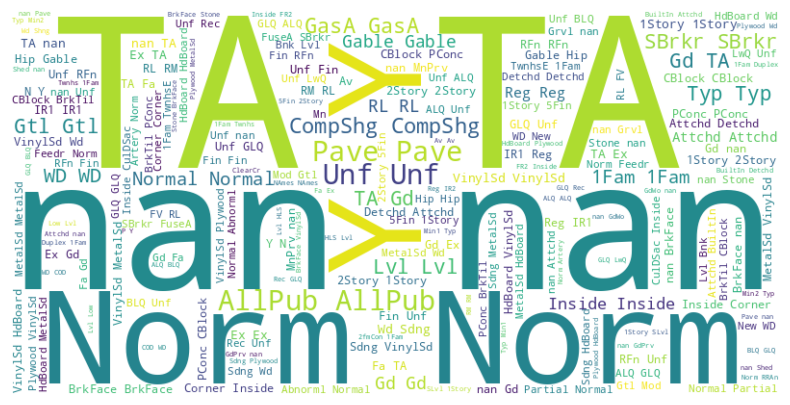

In [ ]:
# Identificar las columnas de texto
text_columns = df_train.select_dtypes(include=['object']).columns

# Combinar los valores de todas las columnas de texto en una sola cadena
text_data = " ".join(df_train[col].astype(str).str.cat(sep=' ') for col in text_columns)

# Definir stopwords (palabras comunes a excluir)
stopwords = set(STOPWORDS)

# Crear la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text_data)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusión

En esta actividad hemos visto algunas de las visualizaciones más comunes y ejemplos de cómo implementarlas en las librerías `Matplotlib` y `Seaborn`. La clave para una buena visualización de los datos es tener claro qué gráfico escoger y por qué, dependiendo de la naturaleza de los datos, y después saber escoger la herramienta para hacerlo posible.

## Bibliografía

Keim, D. A., Mansmann, F., Schneidewind, J., Thomas, J., & Ziegler, H. (2008). Visual analytics: Scope and challenges. In Visual data mining (pp. 76-90). Springer, Berlin, Heidelberg.

Minguillón, J. (2017). Anàlisi visual de dades: conceptes bàsics i eines. Item: revista de biblioteconomia i documentació, 2(63).